In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
red = pd.read_csv('winequality-red.csv', delimiter=";")
white = pd.read_csv('winequality-white.csv', delimiter=";")

red['color'] = 1
white['color'] = 0

wine = pd.concat([red, white], ignore_index=True)

In [50]:
#should i make a column with red or white indicators?

In [8]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [9]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [10]:
wine['quality'].info

<bound method Series.info of 0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64>

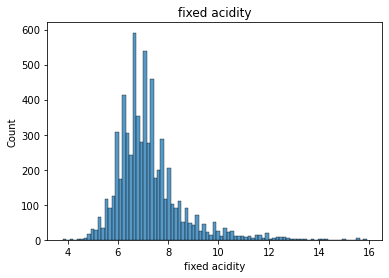

In [11]:
sns.histplot(wine["fixed acidity"], kde=False)
plt.title("fixed acidity")
plt.xlabel("fixed acidity")
plt.ylabel("Count")
plt.show()

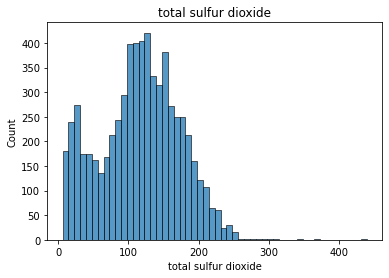

In [12]:
sns.histplot(wine["total sulfur dioxide"], kde=False)
plt.title("total sulfur dioxide")
plt.xlabel("total sulfur dioxide")
plt.ylabel("Count")
plt.show()

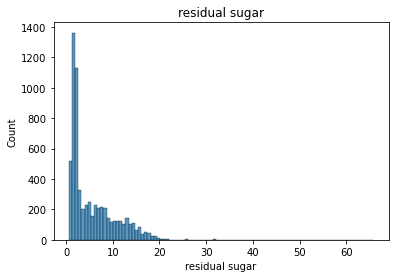

In [13]:
sns.histplot(wine["residual sugar"], kde=False)
plt.title("residual sugar")
plt.xlabel("residual sugar")
plt.ylabel("Count")
plt.show()


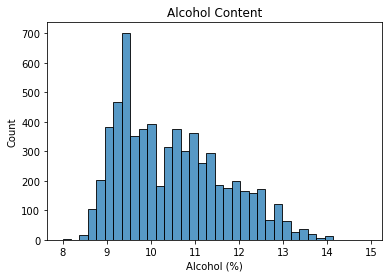

In [14]:
sns.histplot(wine["alcohol"], kde=False)
plt.title("Alcohol Content")
plt.xlabel("Alcohol (%)")
plt.ylabel("Count")
plt.show()

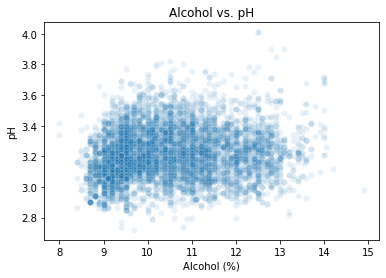

In [15]:
sns.scatterplot(data=wine, x="alcohol", y="pH", alpha=0.1)
plt.title("Alcohol vs. pH")
plt.xlabel("Alcohol (%)")
plt.ylabel("pH")
plt.show()

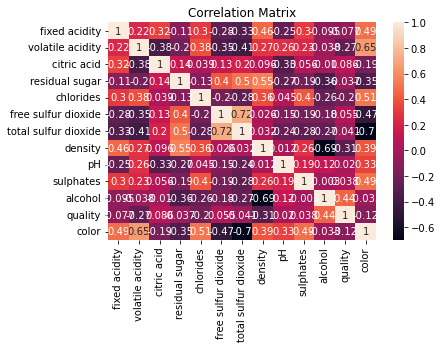

In [16]:
corr_matrix = wine.corr()
sns.heatmap(corr_matrix, cmap="rocket", annot=True)
plt.title("Correlation Matrix")
plt.show()

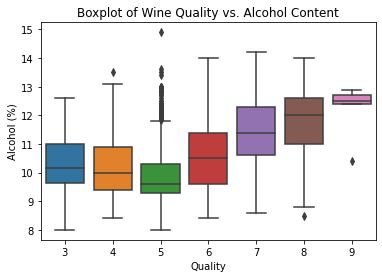

In [17]:
sns.boxplot(x="quality", y="alcohol", data=wine)
plt.title("Boxplot of Wine Quality vs. Alcohol Content")
plt.xlabel("Quality")
plt.ylabel("Alcohol (%)")
plt.show()

In [ ]:
#add a data pipeline here to make it easier to edit desired features

In [18]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(wine.drop("quality", axis=1), wine["quality"], test_size = 0.25, random_state = 1)

# x_test1
# x_train1

In [19]:
knn = KNeighborsClassifier(n_neighbors=5, weights="uniform")

knn.fit(x_train1, y_train1)
y_pred1 = knn.predict(x_test1)

accuracy = accuracy_score(y_test1, y_pred1)
print(accuracy)

0.49046153846153845


In [20]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)

x_train_k = selector.fit_transform(x_train1, y_train1)

mask = selector.get_support()

# feature_names = x_train.feature_names[mask]

print(mask)
print(x_train1.columns)

[False  True False False  True False False  True False False  True  True]
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'color'],
      dtype='object')


In [22]:
true_cols = [col for col, include in zip(x_train1.keys(), mask) if include]
true_data = {col: x_train1[col] for col in true_cols}

# create the DataFrame
x_train_new = pd.DataFrame(true_data)
display(x_train_new)

x_test_new = x_test1[['volatile acidity', 'chlorides', 'density', 'alcohol', 'color']]

,volatile acidity,chlorides,density,alcohol,color
275,0.545,0.087,0.99650,10.7,1
3406,0.200,0.053,1.00080,8.8,0
3163,0.280,0.059,0.99580,10.1,0
4623,0.130,0.042,0.99581,10.7,0
2527,0.250,0.055,0.99800,10.0,0
...,...,...,...,...,...
905,0.580,0.081,0.99800,9.5,1
5192,0.280,0.044,0.99200,10.7,0
3980,0.230,0.042,0.99518,10.2,0
235,0.630,0.097,0.99675,9.0,1


In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()

# fit the scaler to the data and transform the data
x_train_new_std = scaler.fit_transform(x_train_new)
x_test_new_std = scaler.transform(x_test_new)

# convert the numpy arrays back to dataframes
x_train_new = pd.DataFrame(x_train_new_std, columns=x_train_new.columns)
x_test_new = pd.DataFrame(x_test_new_std, columns=x_test_new.columns)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# define the range of values for max_depth to test
max_depth_range = range(1, 20)

# create an empty list to store the accuracy scores for each value of max_depth
accuracy_scores = []

# iterate over the values of max_depth and calculate the accuracy score for each one using 5-fold cross-validation
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, x_train_new, y_train1, cv=10, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# find the index of the maximum accuracy score
best_depth_index = accuracy_scores.index(max(accuracy_scores))

# get the corresponding value of max_depth
best_depth = max_depth_range[best_depth_index]

# create the decision tree classifier with the best value of max_depth
clf = DecisionTreeClassifier(max_depth=best_depth)

# fit the classifier to the training data
clf.fit(x_train_new, y_train1)

# make predictions on the test data
y_pred = clf.predict(x_test_new)

# calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test1, y_pred)

# print the best value of max_depth and the corresponding accuracy score
print("Best value of max_depth: {}".format(best_depth))
print("Accuracy: {:.2f}%".format(accuracy * 100))

/Users/tarun/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/tarun/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/tarun/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/tarun/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/tarun/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less 

Best value of max_depth: 19
Accuracy: 58.77%


/Users/tarun/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada_clf = AdaBoostClassifier(base_estimator=clf)

# define the range of values for n_estimators to test
param_grid = {'n_estimators': range(10, 100, 10)}

# perform grid search cross-validation to find the best value of n_estimators
grid_search = GridSearchCV(ada_clf, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_train_new, y_train1)

# get the best value of n_estimators
best_n_estimators = grid_search.best_params_['n_estimators']

# fit the classifier to the training data using the best value of n_estimators
ada_clf = AdaBoostClassifier(base_estimator=clf, n_estimators=best_n_estimators)
ada_clf.fit(x_train_new, y_train1)

# make predictions on the test data
y_pred = ada_clf.predict(x_test_new)

# calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test1, y_pred)

# print the best value of n_estimators and the corresponding accuracy score
print("Best value of n_estimators: {}".format(best_n_estimators))
print("Accuracy: {:.2f}%".format(accuracy * 100))

/Users/tarun/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


Best value of n_estimators: 50
Accuracy: 64.37%


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# create the random forest classifier
clf = RandomForestClassifier()

# use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train_new, y_train1)

# print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# create the random forest classifier with the best hyperparameters
clf = RandomForestClassifier(**grid_search.best_params_)

# fit the classifier to the training data
clf.fit(x_train_new, y_train1)

# make predictions on the test data
y_pred = clf.predict(x_test_new)

# calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test1, y_pred)

# print the accuracy score
print("Accuracy: {:.2f}%".format(accuracy * 100))


/Users/tarun/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 66.40%


In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# define the range of values for n_estimators to test
n_estimators_range = range(1, 100, 10)

# create an empty list to store the accuracy scores for each value of n_estimators
accuracy_scores = []

# iterate over the values of n_estimators and calculate the accuracy score for each one using 5-fold cross-validation
for n_estimators in n_estimators_range:
    clf = GradientBoostingClassifier(n_estimators=n_estimators, max_depth=best_depth)
    scores = cross_val_score(clf, x_train_new, y_train1, cv=10, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# find the index of the maximum accuracy score
best_n_estimators_index = accuracy_scores.index(max(accuracy_scores))

# get the corresponding value of n_estimators
best_n_estimators = n_estimators_range[best_n_estimators_index]

# create the gradient boosted classifier with the best value of n_estimators and the decision tree as the base estimator
clf = GradientBoostingClassifier(n_estimators=best_n_estimators, max_depth=best_depth)

# fit the classifier to the training data
clf.fit(x_train_new, y_train1)

# make predictions on the test data
y_pred = clf.predict(x_test_new)

# calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test1, y_pred)

# print the best value of n_estimators, best value of max_depth, and the corresponding accuracy score
print("Best value of n_estimators: {}".format(best_n_estimators))
print("Best value of max_depth: {}".format(best_depth))
print("Accuracy: {:.2f}%".format(accuracy * 100))


/Users/tarun/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/tarun/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/tarun/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/tarun/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/tarun/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less 

Best value of n_estimators: 71
Best value of max_depth: 15
Accuracy: 63.38%
